binaryImageNames: ['./test_images/binary/test1.png', './test_images/binary/test2.png', './test_images/binary/test3.png', './test_images/binary/test4.png', './test_images/binary/test5.png', './test_images/binary/test6.png']
testImageNames: ['./test_images/transformed/test1.jpg', './test_images/transformed/test2.jpg', './test_images/transformed/test3.jpg', './test_images/transformed/test4.jpg', './test_images/transformed/test5.jpg', './test_images/transformed/test6.jpg']
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test1.png , croppedBinaryImage.shape: (414, 944) , type: uint8
testImageName:  ./test_images/transformed/test1.jpg , croppedTestImage.shape: (514, 1044) , type: uint8
binaryImageName:  ./test_images/binary/test2.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test2.png , croppedBinaryImage.shape: (414, 944) , type: uint8
testImageName:  ./test_ima

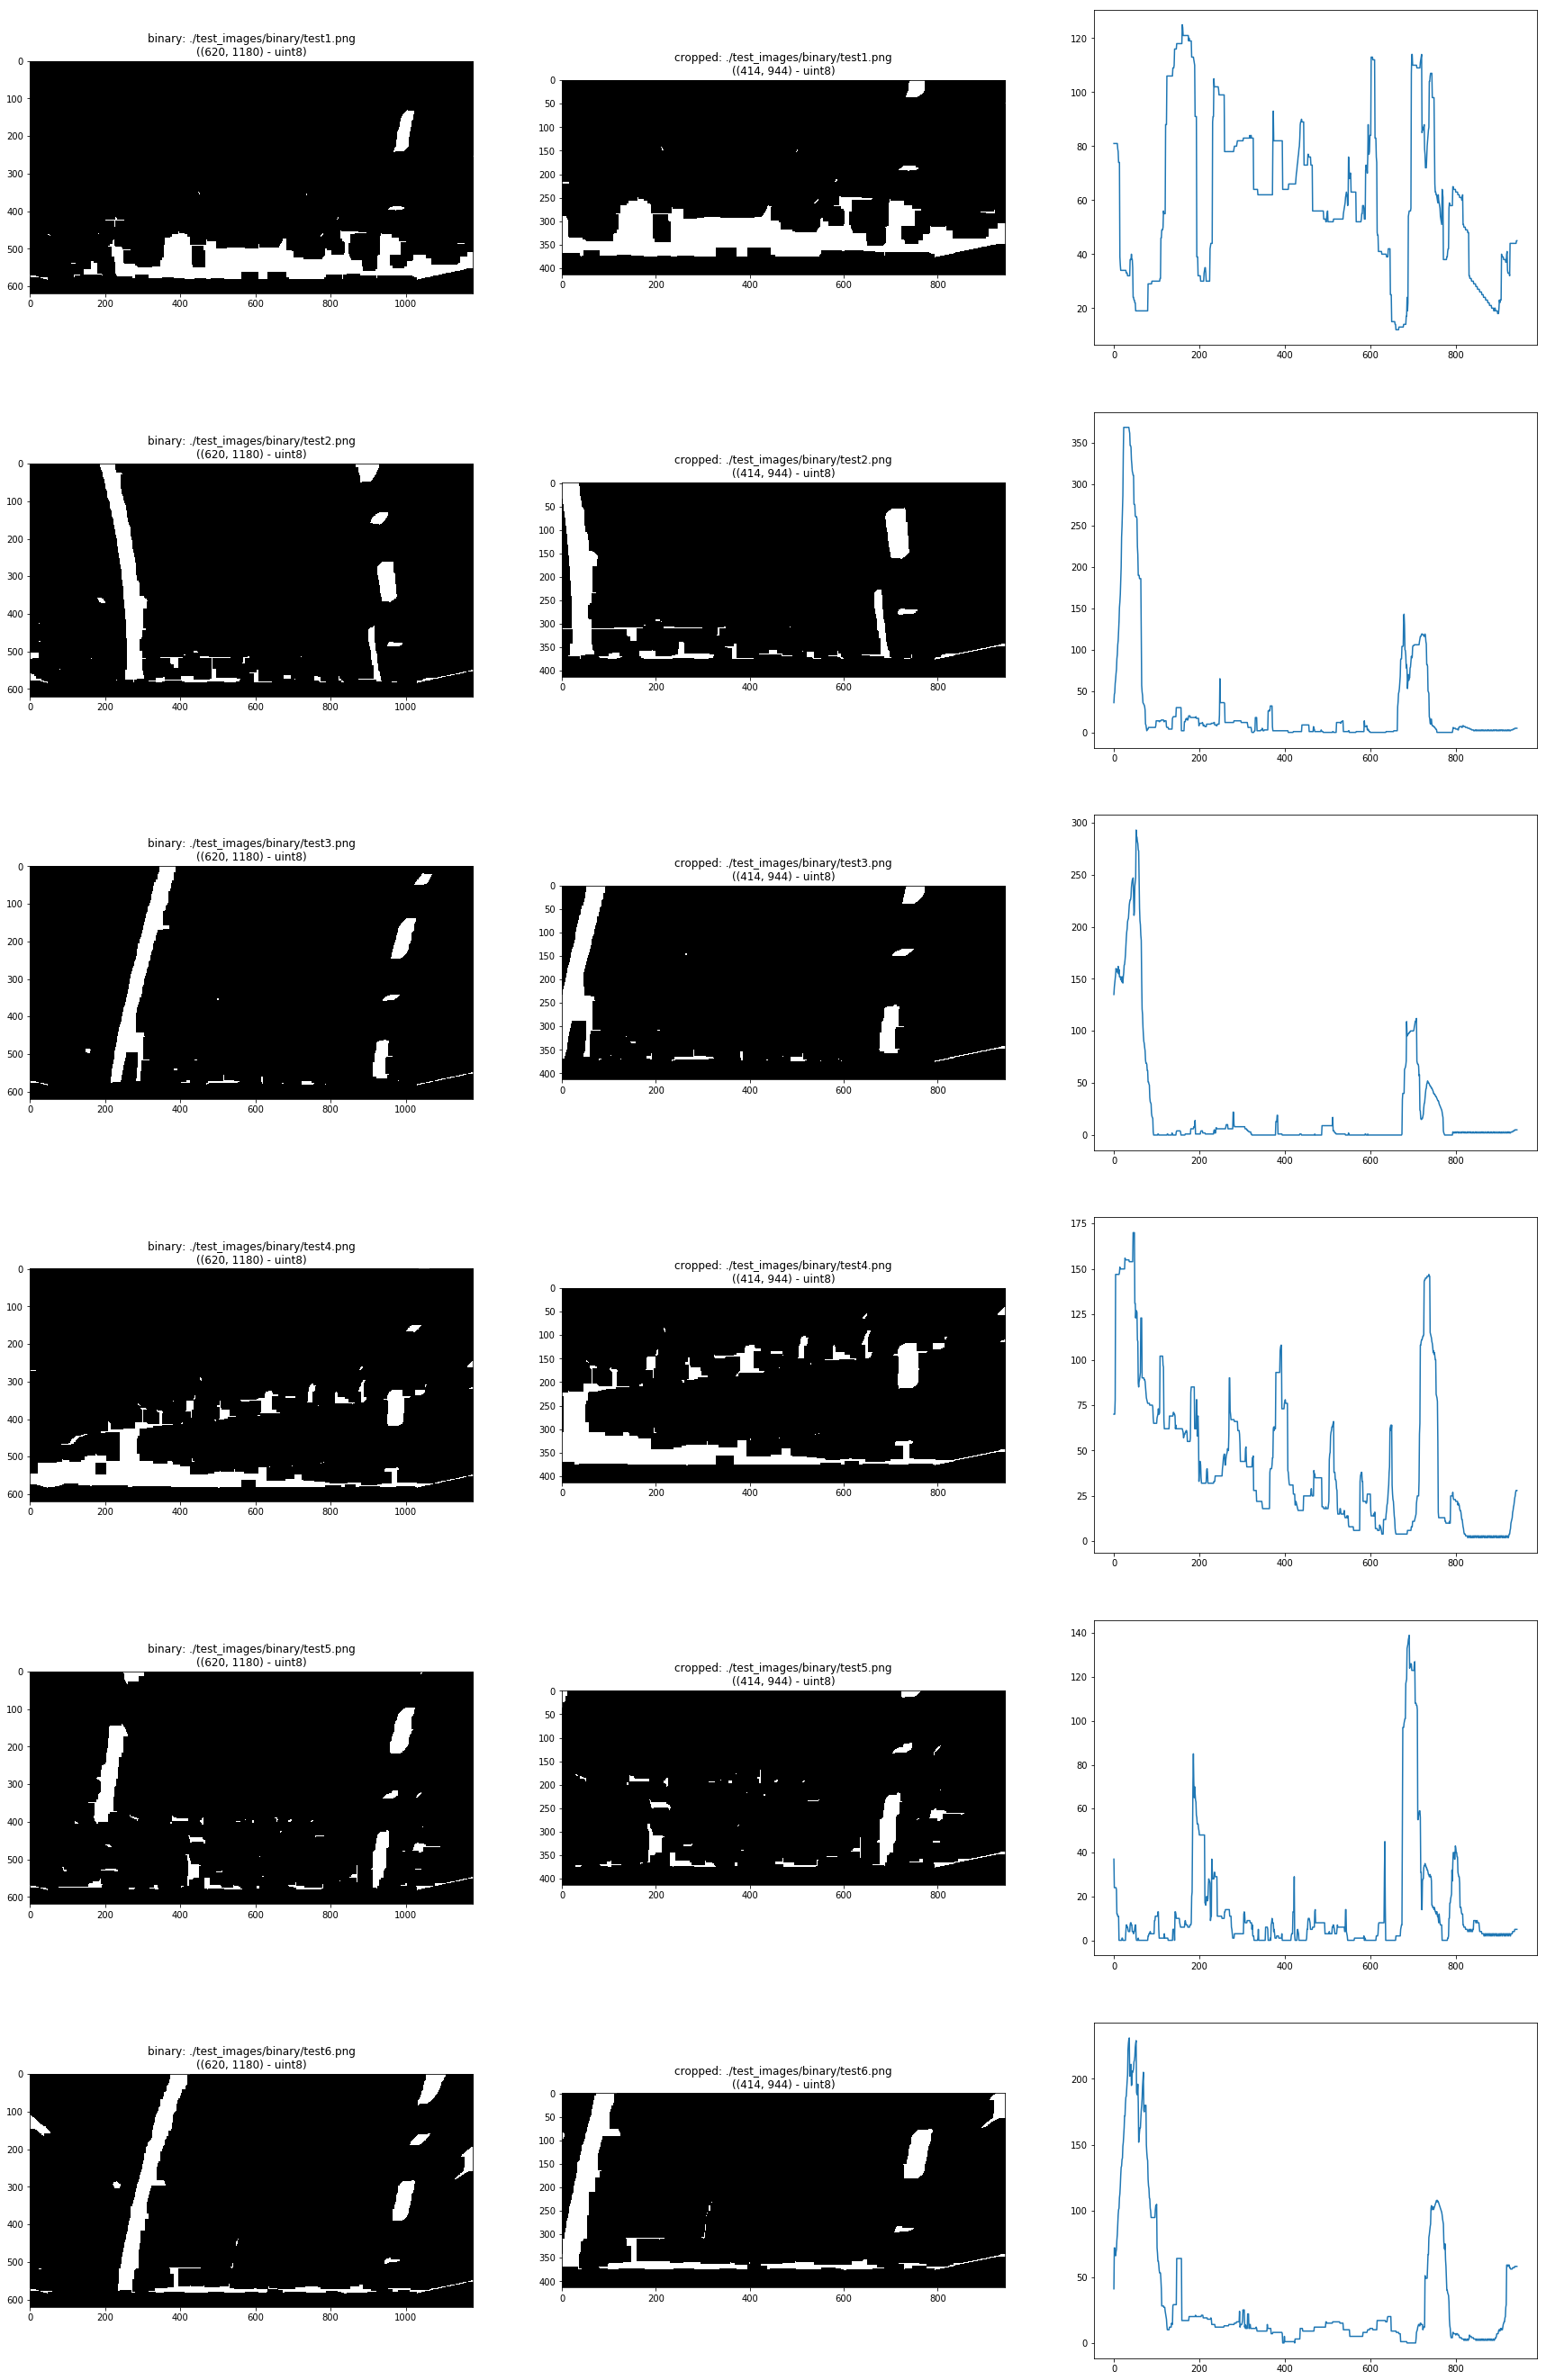

In [7]:
import glob
import numpy as np

binaryImageNames=glob.glob("./test_images/binary/test*")
binaryImageNames.sort()
print("binaryImageNames:", binaryImageNames)
testImageNames=glob.glob("./test_images/transformed/test*")
testImageNames.sort()
print("testImageNames:", testImageNames)

binaryImageColumnCount=3 # original, transformed
totalImageRows=len(binaryImageNames) # 1 row per image

#import matplotlib.image as mpimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
showBinaryImages = plt.figure(figsize = (binaryImageColumnCount*10,totalImageRows*8))

binaryImages={}
croppedBinaryImages={}
croppedTestImages={}
histograms={}

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    binaryImage=cv2.imread(binaryImageName, flags=0) # flags=0 is grayscale
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    binaryImages[binaryImageName]=binaryImage

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+1)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    startingInRow=binaryImage.shape[0]//3
    startingInColumn=binaryImage.shape[1]//5
    
    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+2)
    croppedBinaryImage=binaryImage[startingInRow:,startingInColumn:]
    print("binaryImageName: ",binaryImageName, ", croppedBinaryImage.shape:", croppedBinaryImage.shape, ", type:", croppedBinaryImage.dtype)
    croppedBinaryImages[binaryImageName]=croppedBinaryImage
    p.set_title("cropped: "+binaryImageName+"\n("+str(croppedBinaryImage.shape)+" - "+str(croppedBinaryImage.dtype)+")")
    p.imshow(croppedBinaryImage, cmap='gray')
    
    testImage=cv2.imread(testImageName, flags=0) # flags=0 is grayscale
    croppedTestImage=testImage[startingInRow:,startingInColumn:,]
    print("testImageName: ",testImageName, ", croppedTestImage.shape:", croppedTestImage.shape, ", type:", croppedTestImage.dtype)
    croppedTestImages[testImageName]=croppedTestImage
   
    histogram = np.sum(binaryImage[startingInRow:,startingInColumn:], axis=0) # bucket size ???
    histograms[binaryImageName]=histogram

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+3)
    #p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape[0])+"x"+str(binaryImage.shape[1])+")")
    p.plot(histogram)

binaryImageName:( 0 )  ./test_images/binary/test1.png , leftx_base: 160 , rightx_base: 697
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (414, 944) , type: uint8
total pixels: 390816 , whiteX: 56713 , whiteY: 56713
binaryImageName: ./test_images/binary/test1.png , leftx_base: 160 , rightx_base: 697
total pixels: 390816 , whiteX: 56713 , whiteY: 56713
nwindows:  9 , window_height: 46
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (414, 944) , type: uint8
binaryImageName:  ./test_images/binary/test1.png , visualizationImage.shape: (414, 944, 3) , type: uint8
window:  0 , window.shape: ( 60 , 260 ),( 597 , 797 ) x ( 368 , 414 )
window:  1 , window.shape: ( 73 , 273 ),( 682 , 882 ) x ( 322 , 368 )
window:  2 , window.shape: ( 77 , 277 ),( 680 , 880 ) x ( 276 , 322 )
window:  3 , window.shape: ( 90 , 290 ),( 630 , 830 ) x ( 230 , 276 )
window:  4 , window.shape: ( 62 , 262 ),( 609 , 809 ) x ( 184 , 230 )
window:  5 , window.shape: ( 62 , 262 ),

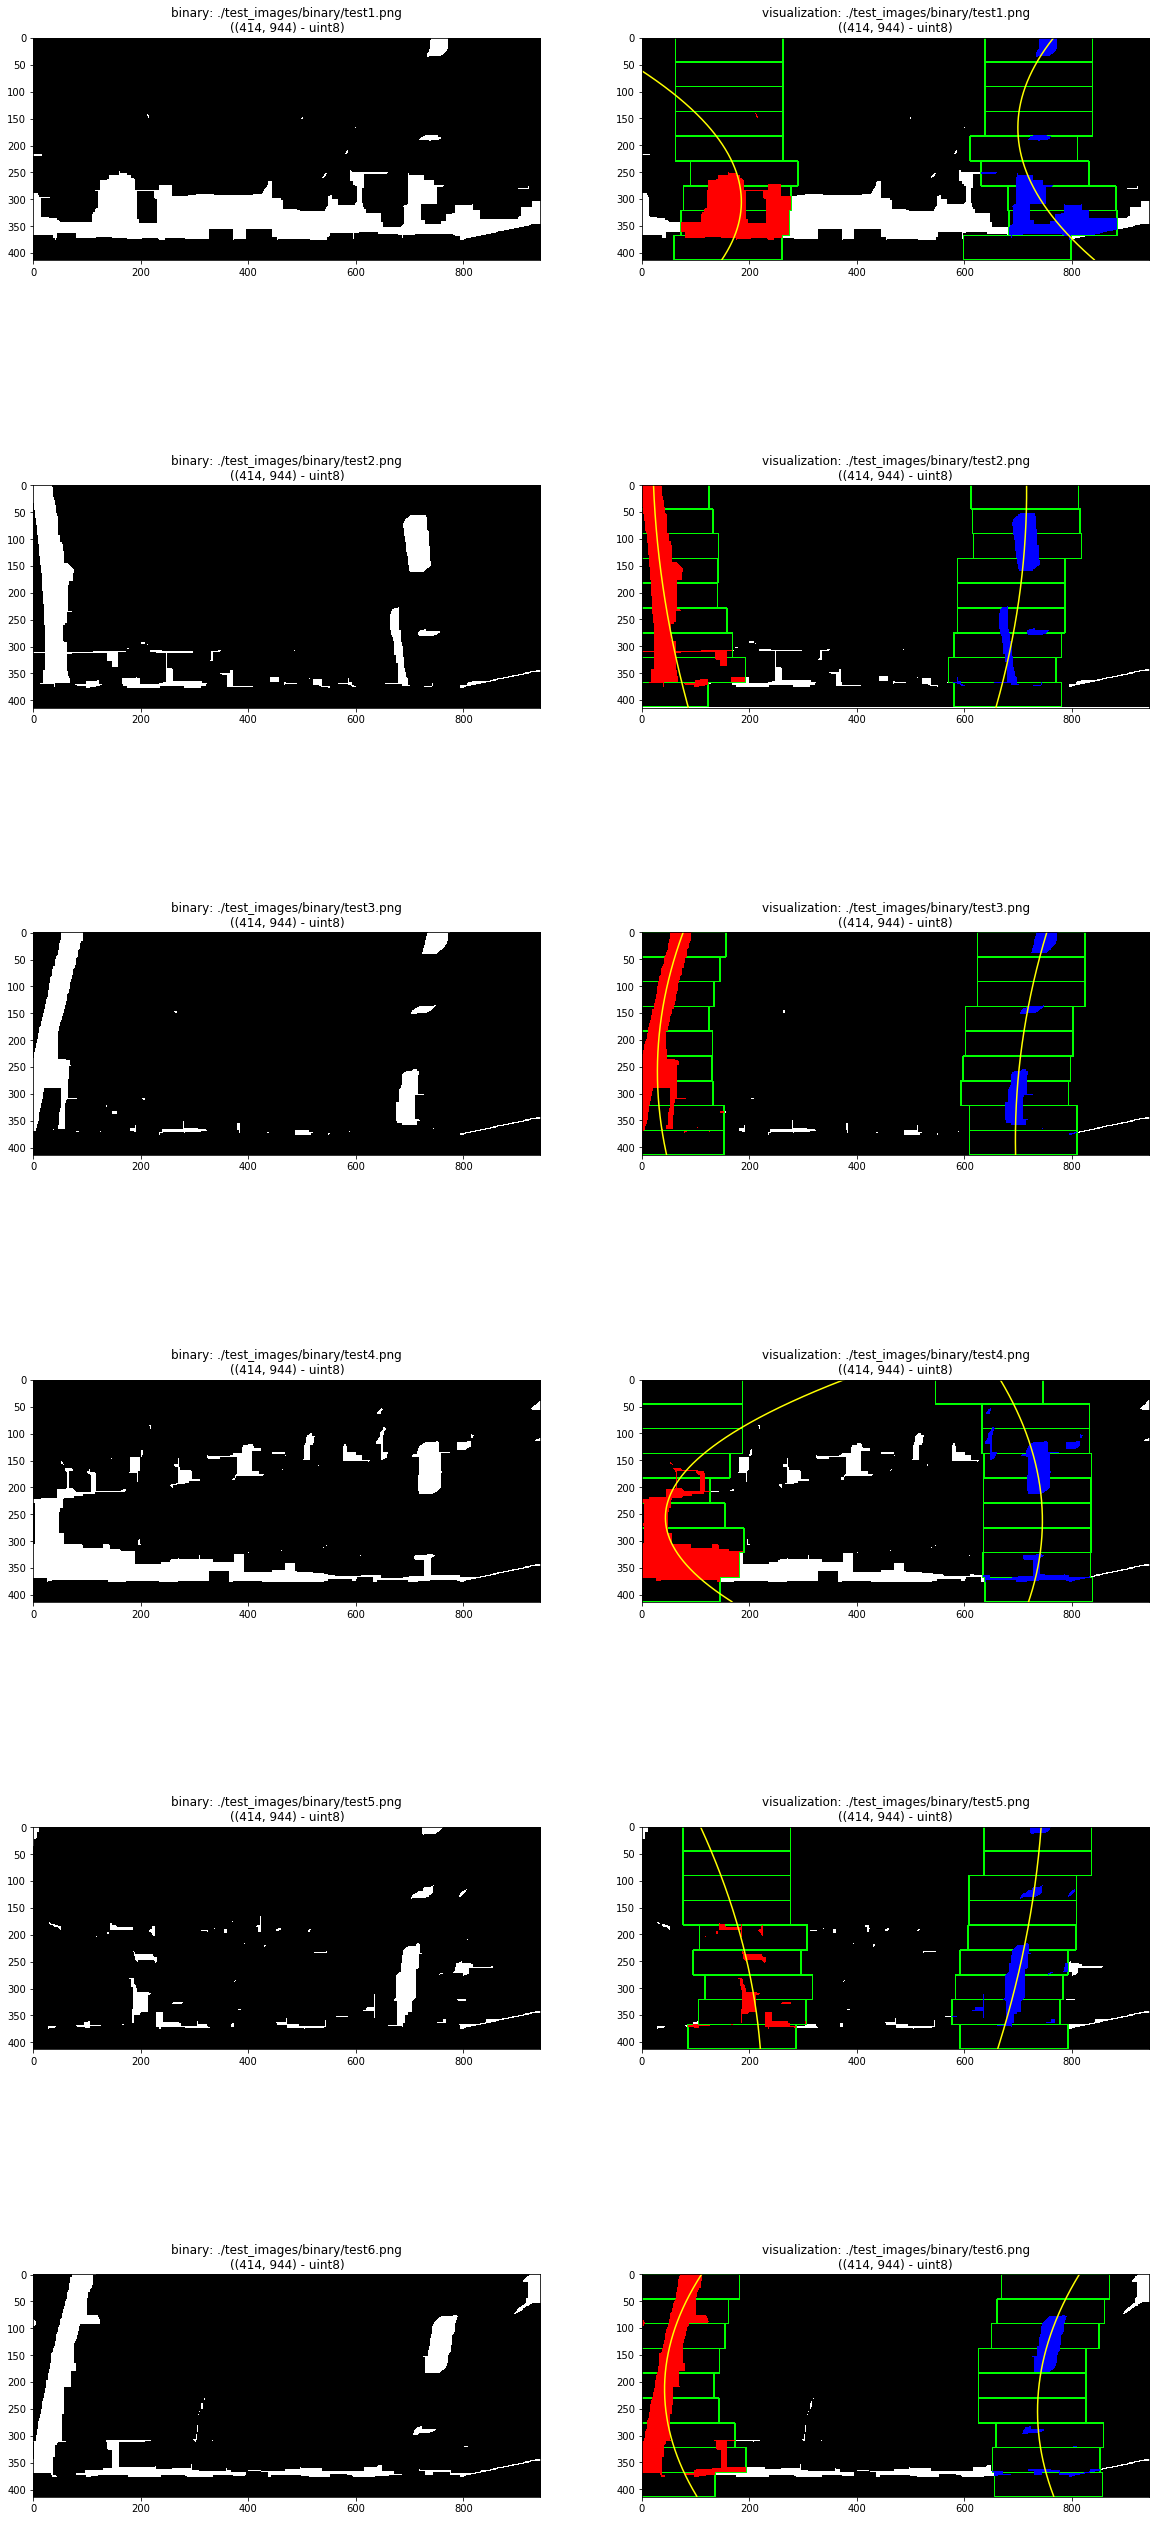

In [8]:
laneVisualizationColumnCount=2 # original, transformed
totalLaneVisualizationRows=len(binaryImageNames) # 1 row per image

%matplotlib inline
showLaneVisualization= plt.figure(figsize = (laneVisualizationColumnCount*10,totalLaneVisualizationRows*8))

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, laneVisualizationColumnCount*len(binaryImageNames), laneVisualizationColumnCount)):
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print("binaryImageName:(", binaryImageIndex, ") ", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    
    binaryImage=croppedBinaryImages[binaryImageName]
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+1)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    # Identify the x and y positions of all nonzero pixels in the image
    white = binaryImage.nonzero()
    whiteY = np.array(white[0])
    whiteX = np.array(white[1])
    print("total pixels:", binaryImage.shape[0]*binaryImage.shape[1], ", whiteX:", len(whiteX), ", whiteY:", len(whiteY))

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binaryImage.shape[0]/nwindows)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print("binaryImageName:", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    # Identify the x and y positions of all nonzero pixels in the image
    white = binaryImage.nonzero()
    whiteY = np.array(white[0])
    whiteX = np.array(white[1])
    print("total pixels:", binaryImage.shape[0]*binaryImage.shape[1], ", whiteX:", len(whiteX), ", whiteY:", len(whiteY))

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binaryImage.shape[0]/nwindows)
    print("nwindows: ",nwindows, ", window_height:", window_height)

    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    visualizationImage = np.dstack((binaryImage, binaryImage, binaryImage))*255
    #visualizationImage = croppedTestImages[testImageName]
    print("binaryImageName: ",binaryImageName, ", visualizationImage.shape:", visualizationImage.shape, ", type:", visualizationImage.dtype)

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binaryImage.shape[0] - (window+1)*window_height
        win_y_high = binaryImage.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(visualizationImage,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(visualizationImage,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        print("window: ",window, ", window.shape: (",
              win_xleft_low,",",win_xleft_high,"),(",
              win_xright_low,",", win_xright_high, ") x (",
              win_y_low, ",", win_y_high, ")")

        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((whiteY >= win_y_low) & (whiteY < win_y_high)
                          & (whiteX >= win_xleft_low) & (whiteX < win_xleft_high)).nonzero()[0]
        good_right_inds = ((whiteY >= win_y_low) & (whiteY < win_y_high) & (whiteX >= win_xright_low) & (whiteX < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(whiteX[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(whiteX[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = whiteX[left_lane_inds]
    lefty = whiteY[left_lane_inds] 
    rightx = whiteX[right_lane_inds]
    righty = whiteY[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binaryImage.shape[0]-1, binaryImage.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    visualizationImage[whiteY[left_lane_inds], whiteX[left_lane_inds]] = [255, 0, 0]
    visualizationImage[whiteY[right_lane_inds], whiteX[right_lane_inds]] = [0, 0, 255]

    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("visualization: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(visualizationImage)
    
    p.plot(left_fitx, ploty, color='yellow')
    p.plot(right_fitx, ploty, color='yellow')
    p.set_xlim([0, binaryImage.shape[1]])
    p.set_ylim([binaryImage.shape[0], 0])
